# Access a NetCDF file from Zenodo

This notebook shows an example how to access a NetCDF published on the [https://zenodo.org](https://zenodo.org) webpage. 

### Setup
In order to run this notebook, you need to install [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo), following the [README](../README.md).

Note that [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

Now, we first import everything we need:

In [1]:
%%time
from xcube.core.store import new_data_store

CPU times: user 3.03 s, sys: 237 ms, total: 3.27 s
Wall time: 1.38 s


We initialize a new data store using the corresponding record ID, which can be found in the URL of the record: https://zenodo.org/records/13882297.

In [2]:
%%time
store = new_data_store("zenodo", root="13882297")

CPU times: user 42.9 ms, sys: 12 ms, total: 54.9 ms
Wall time: 54.1 ms


We can list all available data IDs again executing the following cell.

In [3]:
%%time
store.list_data_ids()

CPU times: user 22.6 ms, sys: 5.23 ms, total: 27.8 ms
Wall time: 901 ms


['gridded_constituents_tideonly.nc',
 'gridded_constituents_ERA5weather.nc',
 'gridded_tidestats_ERA5weather.nc',
 'gridded_tidestats_tideonly.nc']

Next we open a dataset. Note if `chunks` are given, the data set is loaded lazily as a [chunked xr.Dataset](https://xarray.pydata.org/en/v0.10.2/dask.html).

In [4]:
%%time
ds = store.open_data(
    "/gridded_tidestats_ERA5weather.nc",
    chunks={}
)
ds

CPU times: user 77.1 ms, sys: 28.8 ms, total: 106 ms
Wall time: 8.82 s


<xarray.Dataset> Size: 15MB
Dimensions:  (y: 375, x: 297)
Dimensions without coordinates: y, x
Data variables: (12/17)
    nav_lon  (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    nav_lat  (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    z0       (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    HAT      (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    LAT      (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    MHW      (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    ...       ...
    MHHW     (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    MLLW     (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    RangeAT  (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    MSRange  (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    MRange   (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    MNRange  (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
Attributes:
    Author:       Joanne Williams, joll@noc.ac.uk
    Institute:    National Oceanography Centre
    Title:        Tidal constituents for NOCtide from model run
    Modelrun:     ERA5weather
    Modelconfig:  newfriction
    TimeStamp:    11-Jun-2024 13:01:44
    Notes:        Statistics based on ERA5 hindcast run from 1980 to 2022. \n...

We plot the Mean Low Water (MLW) data as an example. 

CPU times: user 216 ms, sys: 33.6 ms, total: 249 ms
Wall time: 734 ms


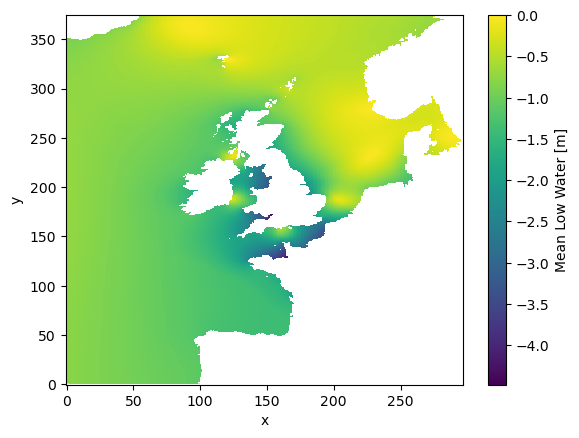

In [5]:
%%time
ds.MLW.plot()